In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from src.data import PancreasDataset
from src.data.dataset import RAW_DIR
sample_dirs = [os.path.join(RAW_DIR, sd) for sd in os.listdir(RAW_DIR)]
rtum1 = sample_dirs[0]
print(rtum1)
dataset = PancreasDataset([rtum1])
image, mask, patient_id = dataset[28]
image_np = image.squeeze().cpu().numpy()
mask_np = mask.cpu().numpy()
# colores para segmentación
cmap = mcolors.ListedColormap(['black', 'green', 'purple', 'red', 'blue'])
# boundaries = [0, 1, 2, 3, 4, 5]
boundaries = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

C:\Users\Usuario\TFG\digipanca\src\utils\..\..\data\raw\rtum1
📊 Loading dataset... 1 patients found.
📊 Dataset loaded with 91 slices.


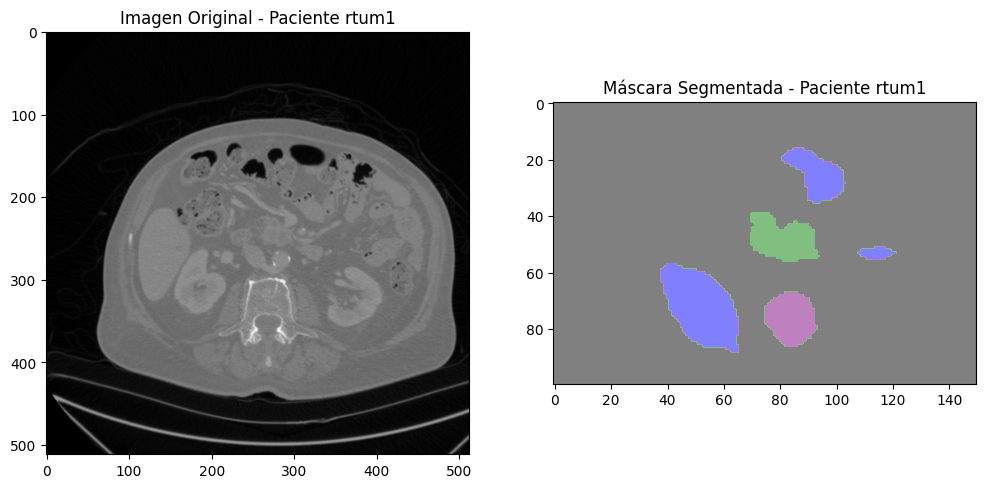

In [25]:
# Mostrar resultados
plt.figure(figsize=(12, 6))

# Imagen Original
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap="gray")
plt.title(f"Imagen Original - Paciente {patient_id}")

# Segmentación
plt.subplot(1, 2, 2)
plt.imshow(image_np, cmap="gray", alpha=0.0)  # Superponer la segmentación sobre la imagen
plt.imshow(mask_np[200:300,200:350], cmap=cmap, norm=norm, alpha=0.5)
plt.title(f"Máscara Segmentada - Paciente {patient_id}")

# Mostrar gráfico
plt.show()

In [3]:
# print(mask_np[200:300,200:350])

In [4]:
# import numpy as np

In [5]:
# with np.printoptions(threshold=np.inf):
#     print(mask_np[200:300,200:350])

In [6]:
print("Valores únicos en la máscara:", np.unique(mask_np))

Valores únicos en la máscara: [0 1 2 3 4]


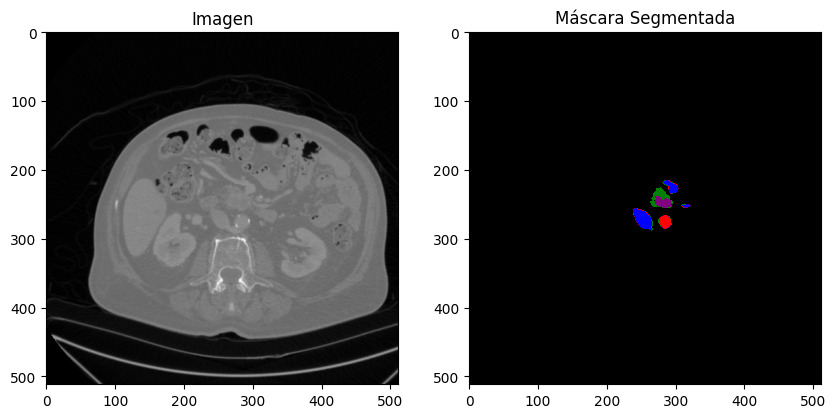

In [7]:
# Configuración de colormap para segmentación
cmap = mcolors.ListedColormap(['black', 'green', 'purple', 'red', 'blue'])
boundaries = [0, 1, 2, 3, 4, 5]
norm = mcolors.BoundaryNorm(boundaries, cmap.N)  # Quitamos clip=True

# Mostrar imagen y máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_np, cmap='gray', vmin=np.min(image_np), vmax=np.max(image_np))
ax[0].set_title("Imagen")

ax[1].imshow(mask_np, cmap=cmap)
ax[1].set_title("Máscara Segmentada")

plt.show()

In [29]:
cmap = mcolors.ListedColormap(['green', 'purple', 'red', 'blue'])
# boundaries = [1, 2, 3, 4, 5]  # Boundaries for the colormap
boundaries = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(boundaries, cmap.N)
# norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)

def visualize_sample(dataset, idx, alpha=0.5, zoom=1.0):
    """
    Visualize the image, overlay, and mask of a CT slice with the corresponding multi-class mask.

    Args:
        dataset: The dataset containing image and mask slices.
        idx: Index of the sample to visualize.
        alpha: Transparency level for the overlay (between 0 and 1).
    """
    image, mask, patient_id = dataset[idx]
    
    image = image.squeeze().numpy()  # Remove the channel dimension for the image
    mask = mask.numpy()              # The mask is already a 2D array without channel dimension

    print(np.unique(mask))

    # Set the background to transparent by masking out class 0 (background)
    mask_no_bg = np.ma.masked_where(mask == 0, mask)  # Mask class 0 (background)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Display the grayscale image on the left
    axes[0].imshow(image[int(200*zoom):int(-200*zoom), int(150*zoom):int(-150*zoom)], cmap='gray')
    axes[0].set_title(f'CT Image - Patient {patient_id}')
    axes[0].axis('off')

    # 2. Display the grayscale image with the segmentation mask overlaid (center)
    axes[1].imshow(image[int(200*zoom):int(-200*zoom), int(150*zoom):int(-150*zoom)], cmap='gray', extent=(0, image.shape[1], image.shape[0], 0))  # Set extent
    axes[1].imshow(mask_no_bg[int(200*zoom):int(-200*zoom), int(150*zoom):int(-150*zoom)], cmap=cmap, norm=norm, alpha=alpha, extent=(0, image.shape[1], image.shape[0], 0))  # Align mask with same extent
    axes[1].set_title(f'Overlay - Patient {patient_id}')
    axes[1].axis('off')

    # 3. Display the multi-class mask on the right
    axes[2].imshow(mask_no_bg[int(200*zoom):int(-200*zoom), int(150*zoom):int(-150*zoom)], cmap=cmap, norm=norm)
    axes[2].set_title(f'Segmentation Mask - Patient {patient_id}')
    axes[2].axis('off')

    # Add a color bar without shrinking the last plot
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Create new axis for color bar
    colorbar = plt.colorbar(mappable=plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
    colorbar.set_ticks([1.5, 2.5, 3.5, 4.5])
    colorbar.set_ticklabels(['Pancreas', 'Tumor', 'Arterias', 'Venas'])

    # Adjust layout to prevent the colorbar from shrinking the overlay plot
    plt.subplots_adjust(wspace=0.4, right=0.9)

    plt.show()

[0 1 2 3 4]


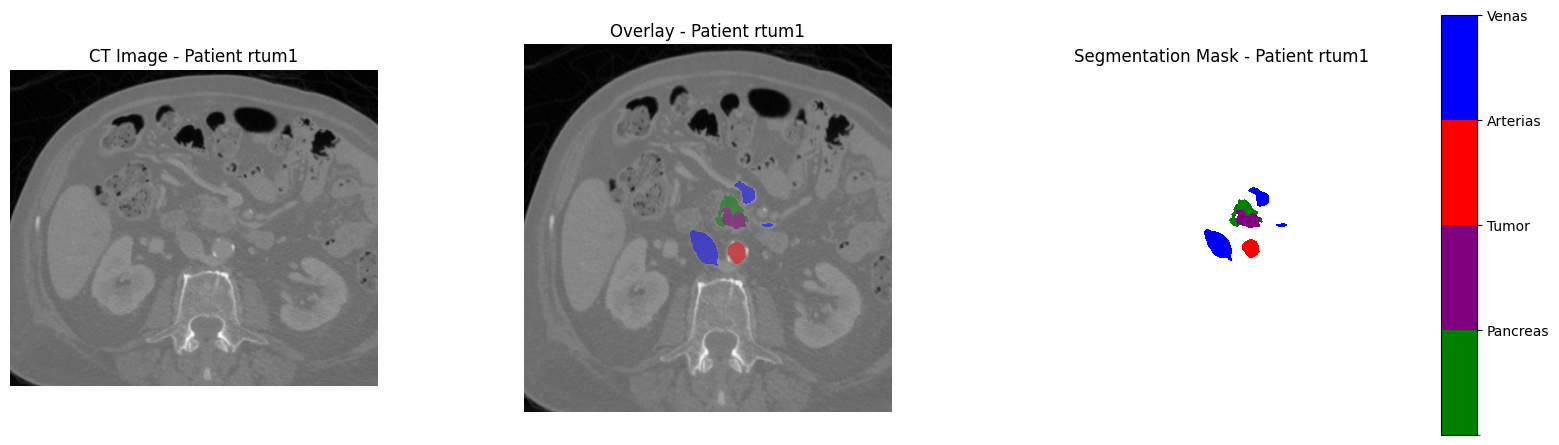

In [31]:
visualize_sample(dataset, 28, 0.5, zoom=0.5)

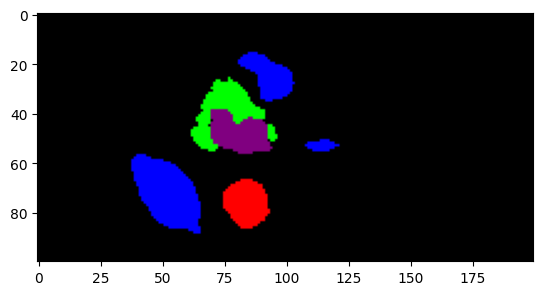

In [28]:
colors = {
    1: (0, 255, 0),   # Verde
    2: (128, 0, 128), # Morado
    3: (255, 0, 0),   # Rojo (Arterias)
    4: (0, 0, 255)    # Azul (Venas, ¿esperado?)
}

image, maskid, patient_id = dataset[28]

def aplicar_colores(mask, colors):
    rgb = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for label, color in colors.items():
        rgb[mask == label] = color
    return rgb

mask_rgb = aplicar_colores(maskid, colors)
plt.imshow(mask_rgb[200:300,200:400])
plt.show()


In [32]:
def visualize_label_mask(mask, label, title="Label Visualization"):
    """
    Visualize a binary mask for a specific label.

    Args:
        mask: 2D numpy array containing the segmentation mask.
        label: The label to highlight (e.g., 4 for veins).
        title: Title for the plot.
    """
    binary_mask = (mask == label).astype(np.uint8)  # Convert label to 1, everything else to 0
    
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_mask, cmap='gray')  # White for label, black for background
    plt.title(title)
    plt.axis('off')
    plt.show()


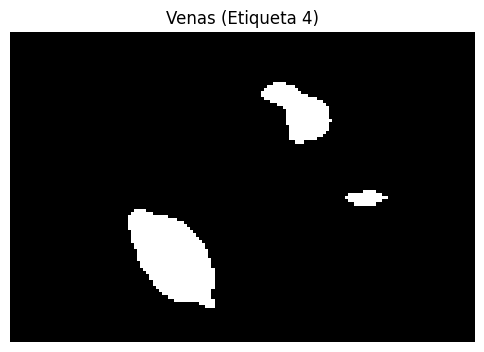

In [36]:
image, mask, patient_id = dataset[28]
    
image = image.squeeze().numpy()  # Remove the channel dimension for the image
mask = mask.numpy()              # The mask is already a 2D array without channel dimension
visualize_label_mask(mask[200:300,200:350], 4, "Venas (Etiqueta 4)")